In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Train, Iteration: 5000
rank5 [0.987, 0.985, 0.982]
rank20 [1.0, 0.995, 0.998]
Test, Iteration: 5000
rank5 [0.916, 0.908, 0.905]
rank20 [0.963, 0.965, 0.963]


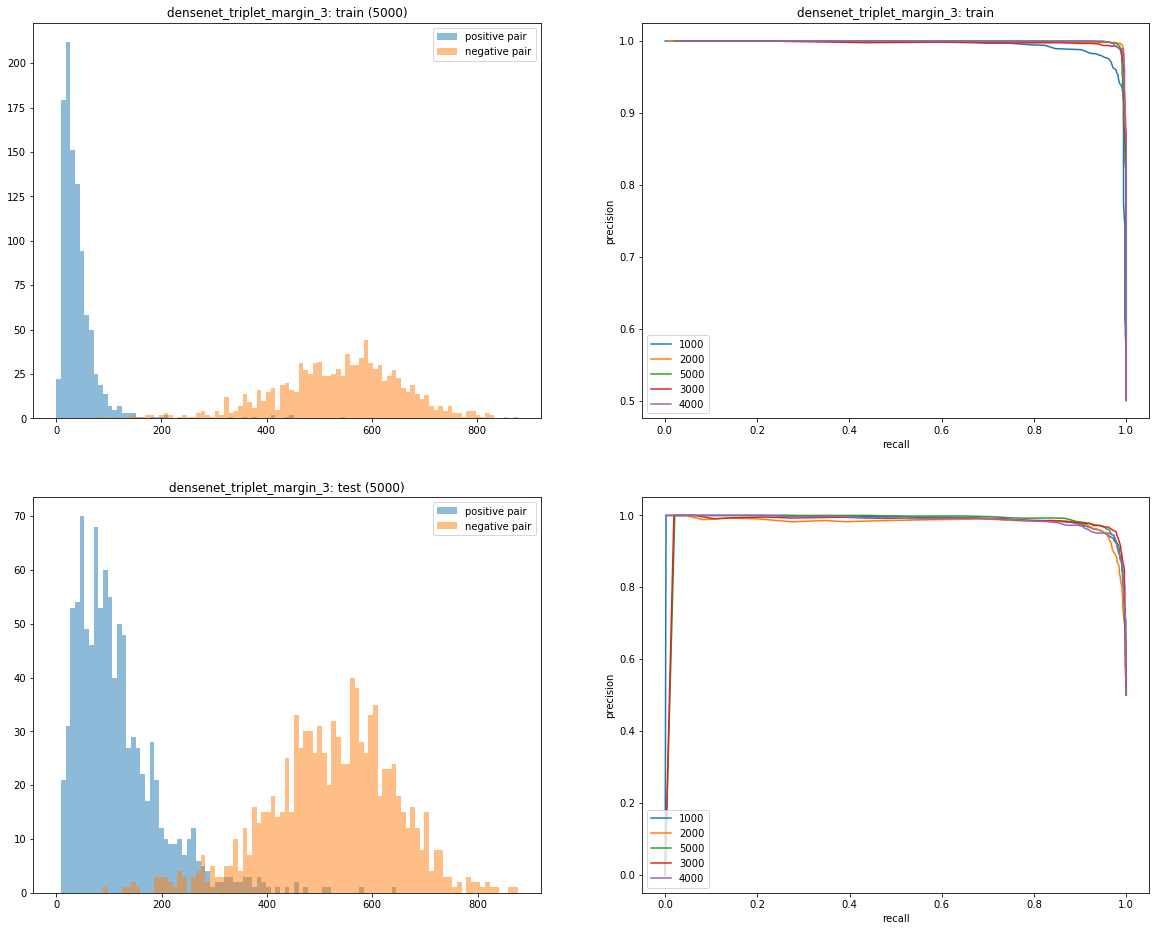

Train, Iteration: 10000
rank5 [0.726, 0.725, 0.715]
rank20 [0.851, 0.857, 0.853]
Test, Iteration: 5000
rank5 [0.697, 0.709, 0.724]
rank20 [0.83, 0.857, 0.822]


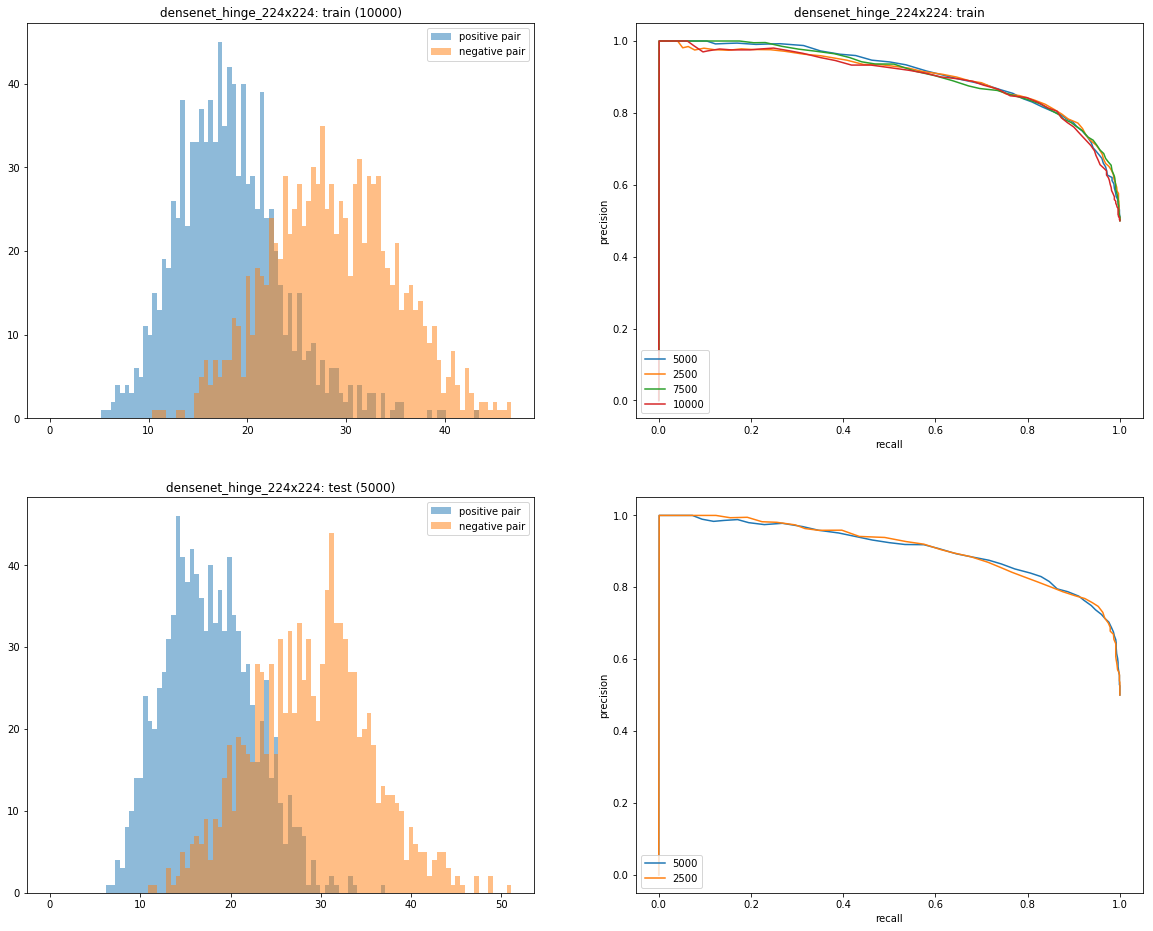

Train, Iteration: 10000
rank5 [0.324, 0.322, 0.277]
rank20 [0.451, 0.446, 0.473]
Test, Iteration: 5000
rank5 [0.319, 0.298, 0.303]
rank20 [0.464, 0.462, 0.437]


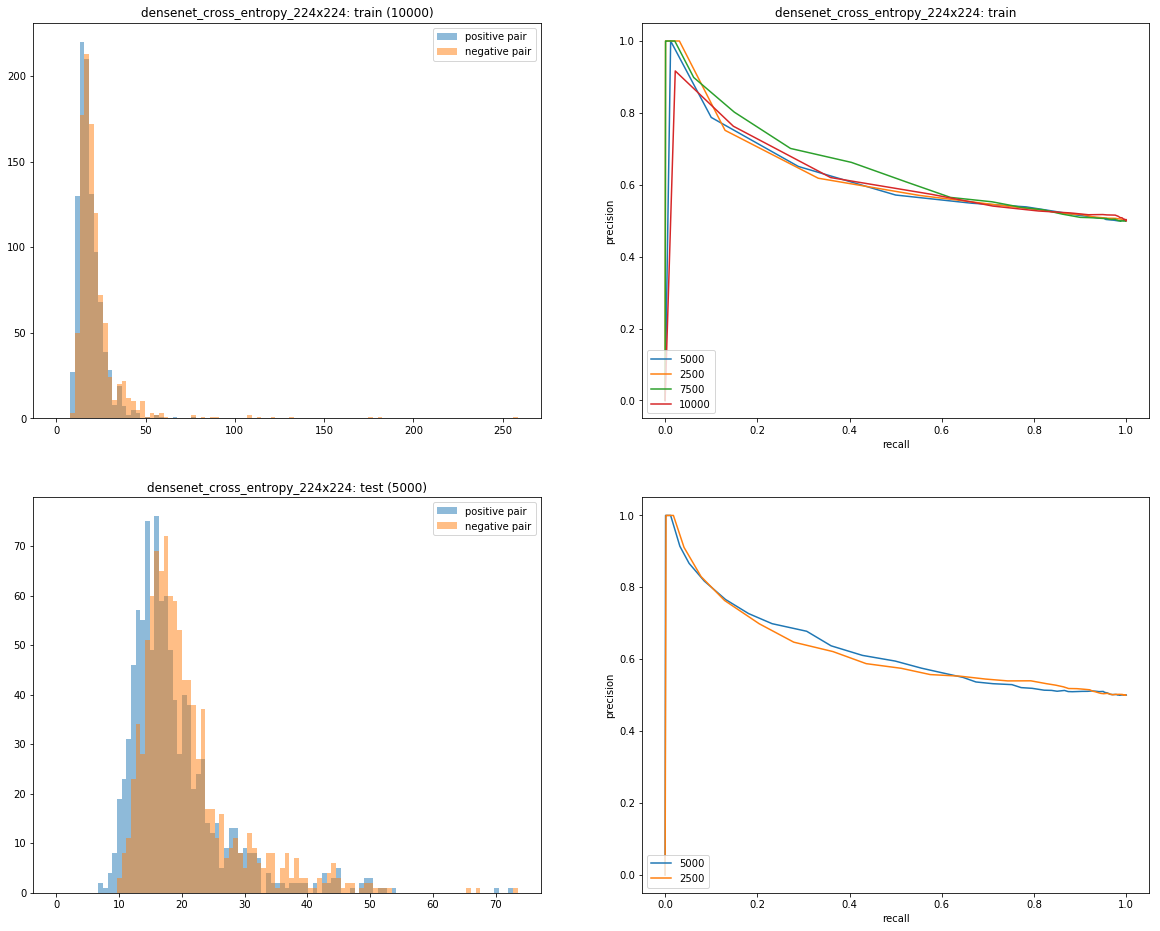

Train, Iteration: 5000
rank5 [0.988, 0.983, 0.988]
rank20 [0.998, 0.995, 0.996]
Test, Iteration: 5000
rank5 [0.868, 0.88, 0.873]
rank20 [0.953, 0.946, 0.958]


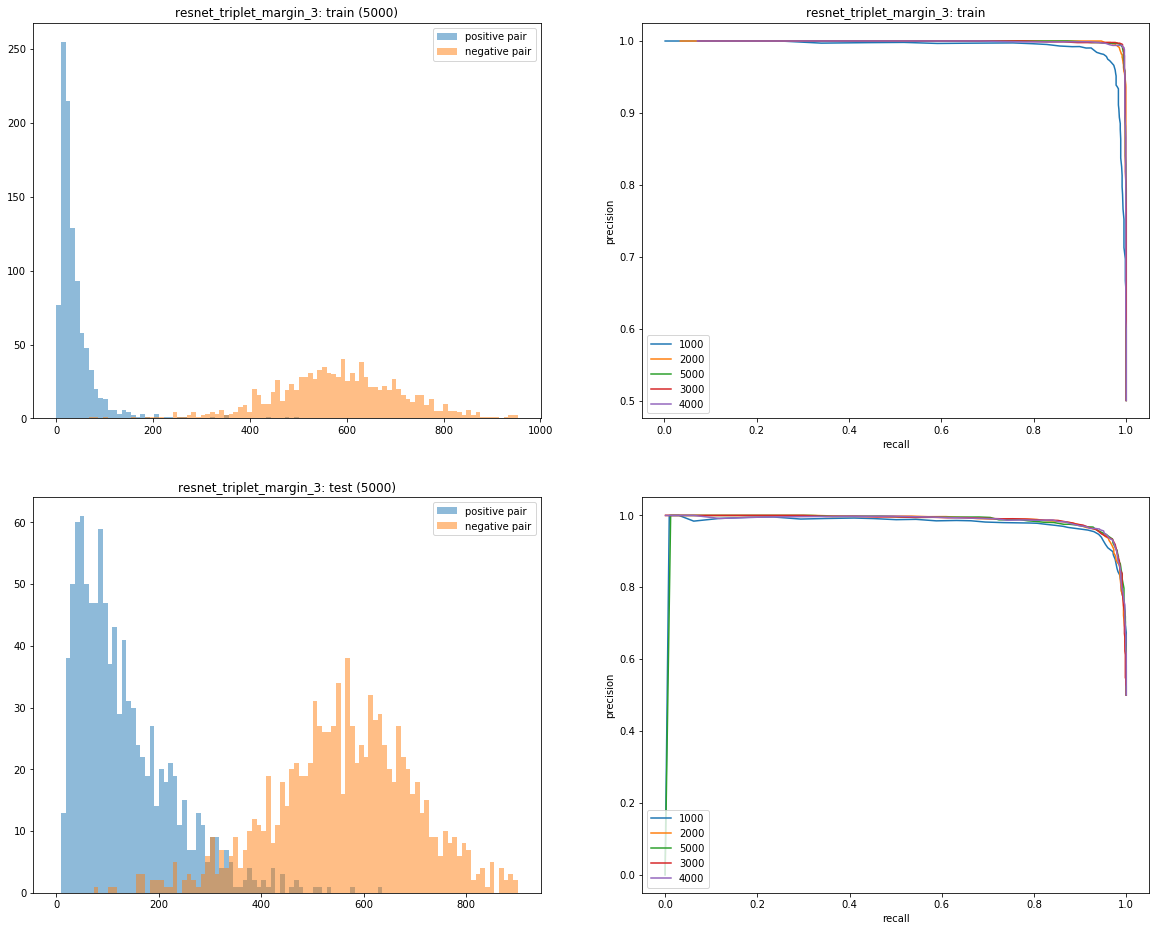

Train, Iteration: 10000
rank5 [0.765, 0.773, 0.781]
rank20 [0.903, 0.894, 0.897]
Test, Iteration: 5000
rank5 [0.767, 0.782, 0.77]
rank20 [0.882, 0.896, 0.884]


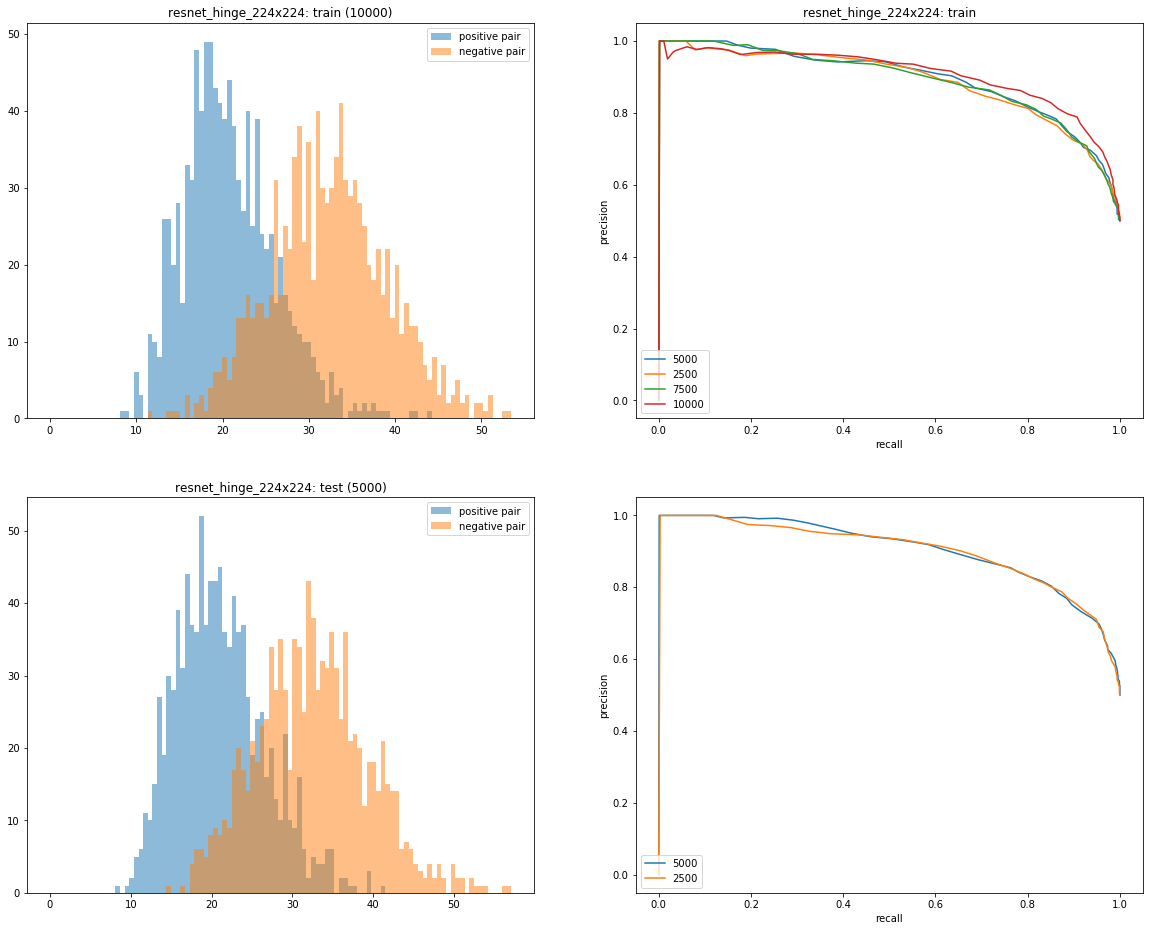

Train, Iteration: 10000
rank5 [0.27, 0.254, 0.27]
rank20 [0.409, 0.39, 0.388]
Test, Iteration: 5000
rank5 [0.279, 0.294, 0.289]
rank20 [0.407, 0.421, 0.425]


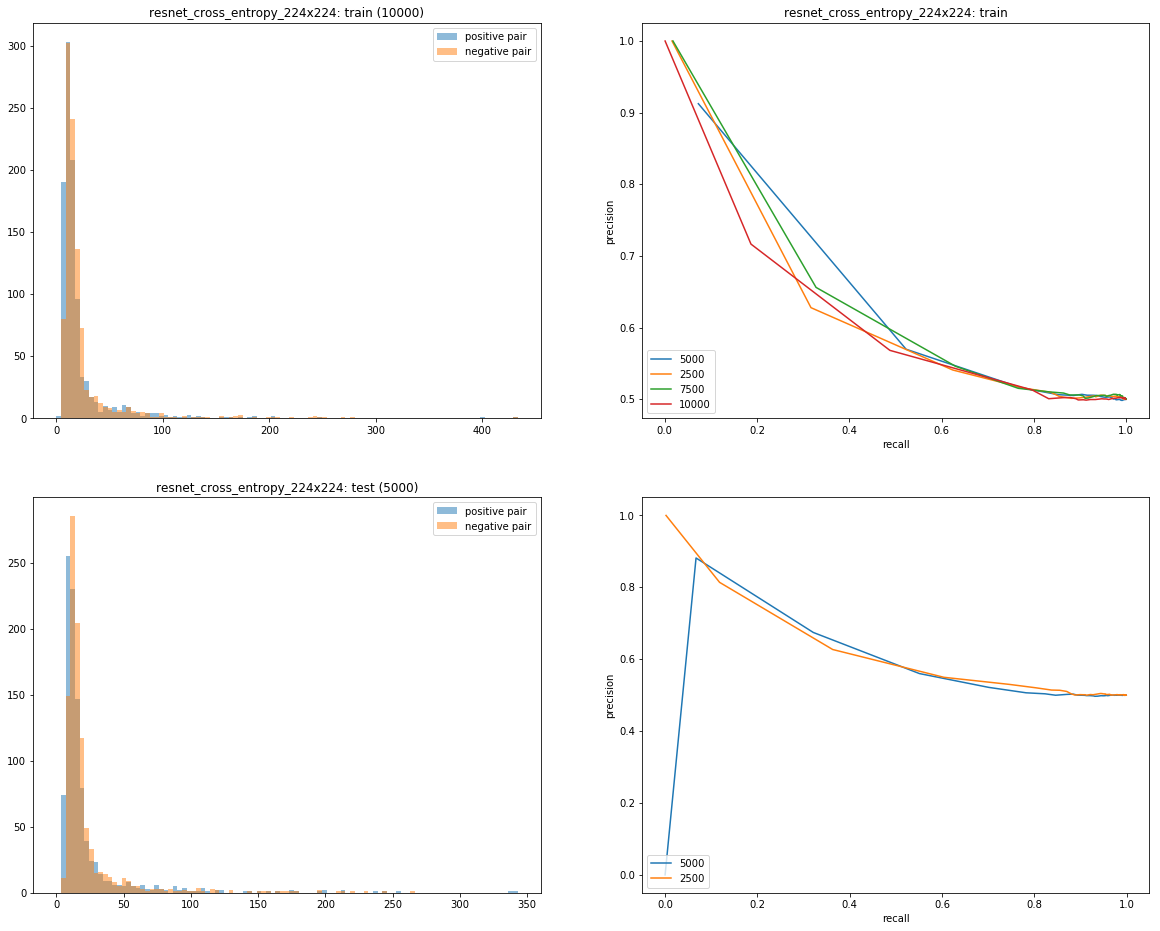

In [2]:
tensorflow_root = '/home/albert/github/tensorflow/models/'

for model_root in ['densenet_triplet_margin_3', 'densenet_hinge_224x224', 'densenet_cross_entropy_224x224', 
                   'resnet_triplet_margin_3', 'resnet_hinge_224x224', 'resnet_cross_entropy_224x224', ]:
    plt.figure(figsize=(20,16))
    
    train_score = np.load(tensorflow_root + '%s/%s_score.npz' % (model_root, model_root))['arr_0'].item()
    
    plt.subplot(2,2,1)
    last_iter_train_keys = train_score['pos_distance'].keys()
    last_iter_train_keys.sort()
    last_iter_train = last_iter_train_keys[-1]
    bins = np.linspace(0, np.max(np.array(train_score['pos_distance'][last_iter_train] + 
                                          train_score['neg_distance'][last_iter_train])), 100)
    plt.hist(train_score['pos_distance'][last_iter_train], bins, alpha=0.5, label='positive pair')
    plt.hist(train_score['neg_distance'][last_iter_train], bins, alpha=0.5, label='negative pair')
    plt.legend(loc='upper right')
    plt.gca().set_xlim(auto=True)
    plt.title('%s: train (%d)' % (model_root, last_iter_train))
    
    plt.subplot(2,2,2)
    for iterations in train_score['recall'].keys():
        plt.plot(train_score['recall'][iterations], train_score['precision'][iterations], label=str(iterations))
    plt.legend(loc='lower left')
    plt.xlabel('recall')
    plt.ylabel('precision')
    plt.title('%s: train' % model_root)
    
    print 'Train, Iteration: %d' % last_iter_train
    print 'rank5' , train_score['rank5'][last_iter_train]
    print 'rank20' , train_score['rank20'][last_iter_train]

    test_score = np.load(tensorflow_root + '%s/%s_test_score.npz' % (model_root, model_root))['arr_0'].item()
    
    plt.subplot(2,2,3)
    last_iter_test_keys = test_score['pos_distance'].keys()
    last_iter_test_keys.sort()
    last_iter_test = last_iter_test_keys[-1]
    bins = np.linspace(0, np.max(np.array(test_score['pos_distance'][last_iter_test] + 
                                          test_score['neg_distance'][last_iter_test])), 100)
    plt.hist(test_score['pos_distance'][last_iter_test], bins, alpha=0.5, label='positive pair')
    plt.hist(test_score['neg_distance'][last_iter_test], bins, alpha=0.5, label='negative pair')
    plt.legend(loc='upper right')
    plt.gca().set_xlim(auto=True)
    plt.title('%s: test (%d)' % (model_root, last_iter_test))
    
    plt.subplot(2,2,4)
    for iterations in test_score['recall'].keys():
        plt.plot(test_score['recall'][iterations], test_score['precision'][iterations], label=str(iterations))
    plt.legend(loc='lower left')
    plt.xlabel('recall')
    plt.ylabel('precision')
    
    print 'Test, Iteration: %d' % last_iter_test
    print 'rank5' , test_score['rank5'][last_iter_test]
    print 'rank20' , test_score['rank20'][last_iter_test]
    
    plt.show()

In [ ]:
m = 12
for r in range(1,m + 1):
    iterations = r * 2500
    pos_distance = score['pos_distance'][iterations]
    neg_distance = score['neg_distance'][iterations]
    
    plt.figure(figsize=(20,5))
    plt.subplot(1,3, 1)
    bins = np.linspace(0, np.max(np.array(pos_distance + neg_distance)), 100)
    plt.hist(score['pos_distance'][iterations], bins, alpha=0.5, label='positive pair')
    plt.hist(score['neg_distance'][iterations], bins, alpha=0.5, label='negative pair')
    plt.legend(loc='upper right')
    plt.title('triplet margin %d' % iterations)

    plt.subplot(1,3, 2)
    plt.plot(score['recall'][iterations], score['precision'][iterations])
    plt.xlabel('recall')
    plt.ylabel('precision')
    plt.title('triplet margin %d' % iterations)

    plt.subplot(1,3, 3)
    plt.plot(np.linspace(0, np.max(np.array(pos_distance + neg_distance)), 101)[1:], 
             score['matt_coef'][iterations])
    plt.xlabel('dist')
    plt.ylabel('matt_coef')
    plt.title('triplet margin %d' % iterations)

    plt.show()